# Probability Distribution Function 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom

In [2]:
df = pd.read_csv('king.csv')
print(df.shape)
df.head(3)

(21613, 13)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0


In [3]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

# Descrete Variable 
`Probability Mass Function (PMF)`

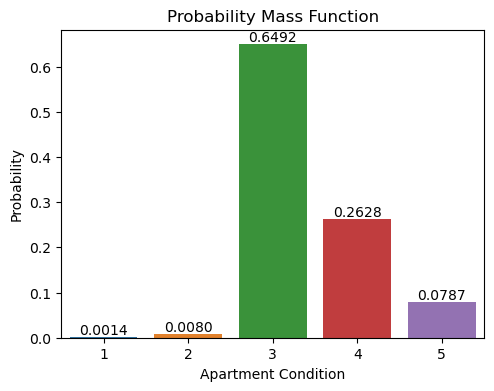

In [3]:
#
plt.figure(figsize=(12,4))

prob = df['condition'].value_counts(normalize=True)
# prob = prob.sort_index


ax = plt.subplot(1,2,1)
ax = sns.barplot(x = prob.index, 
                 y=prob.values,  
                  
                )

plt.xlabel('Apartment Condition')
plt.ylabel('Probability')
plt.title('Probability Mass Function')

for i in ax.containers:
    ax.bar_label(i,
                fmt='%.4f', # show 4 decimals only
                )

- In a random selection, there is a 65% probability of getting a number 3 condition apartment.
- 98.9% probability of apartment are in normal to good condition.

***

# Binomial

`Pre reqiusites`
1. There are 2 potential outcomes pertrial.
2. The probability of success (p) is the same accross all trials.
3. The number of trials (n) is fixed.
4. Each trial is independent.

### Example
Study shows color blindness affects about 8% of men. 

In [5]:
df2 = pd.read_csv('blindness.csv')
ct = pd.crosstab(df2.Sex, df2.Checkup_result,
                 margins=True, 
#                  normalize=True
                )
ct

Checkup_result,negative,positive,All
Sex,,,
Female,17,7,24
Male,23,2,25
All,40,9,49


In [6]:
# probability of Male and positive given Male
# p(Male and positive | Male )
2/25

0.08

A random of 10 men are taken. Find the probability that:
1. All men are colorblind (n = 10)
2. No men are colorblind
3. Exactly 2 men are colorblind
4. Atlest 2 or more men are colorblind

### Visualize

Approach :

- Define n and p.
- Define a list of values of r from 0 to n.
- Get mean and variance.
- For each r, calculate the pmf and store in a list.

In [7]:
# setting the values of n and p
n = 10
p = 0.08

# defining the list of r values
r_values = list(range(n + 1))

# obtaining the mean and variance 
mean, var = binom.stats(n, p)

# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]

# printing the table
# print("r\tp(r)")
# for i in range(n + 1):
#     print(str(r_values[i]) + "\t" + str(dist[i]))
    
# # printing mean and variance
# print("mean = "+str(mean))
# print("variance = "+str(var))

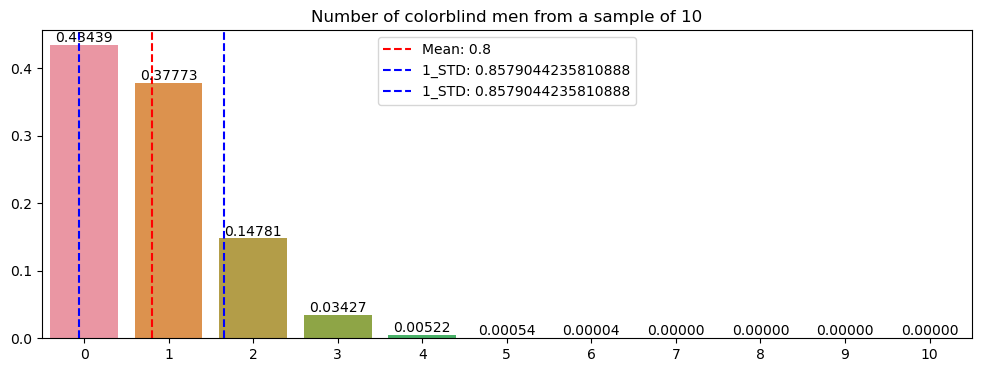

In [8]:
#
plt.figure(figsize=(12,4))
ax = sns.barplot(x = r_values, 
                 y= dist,  
                               )

plt.title('Number of colorblind men from a sample of 10')
for i in ax.containers:
    ax.bar_label(i,
                fmt='%.5f'
                )

m = n * p
var = (n * p) * (1-p)
std = var ** .5
  
    
    
plt.axvline(m, linestyle='--', color='r', label='Mean: ' + str(m))
plt.axvline(m + std, linestyle='--', color='b', label='1_STD: ' + str(std))
plt.axvline(m - std, linestyle='--', color='b', label='1_STD: ' + str(std))


plt.legend(loc='upper center')

### All men are colorblind (n = 10)

In [9]:
stats.binom.pmf(10,10,.08)

1.0737418240000003e-11

### No men are colorblind

In [10]:
stats.binom.pmf(0,10,.08)

0.4343884542236323

### Exactly 2 men are colorblind

In [11]:
stats.binom.pmf(2,10,.08)

0.14780703546361773

### Atlest 2 or more men are colorblind

In this question, we need to change our code to cummulative distibution function (CDF)

In [12]:
# this code get the cumulative value from 2 to 10 probability.
# subtrach the probability of 0 to 1 from 100%
1 - stats.binom.cdf(1,10,.08)

0.18788245514712265

### The number of expected color blind in the sample
`This is also the mean of the distribution`

In [13]:
m = n * p
m

0.8

### Standard Deviation

In [14]:
# n * p ( 1 - p)
var = (n * p) * (1-p)
std = var ** .5
std

0.8579044235810888

When success and failure are equally likely, the binomial distribution is a normal distribution. Hence, changing the value of p to 0.5, we obtain this graph, which is identical to a normal distribution plot :

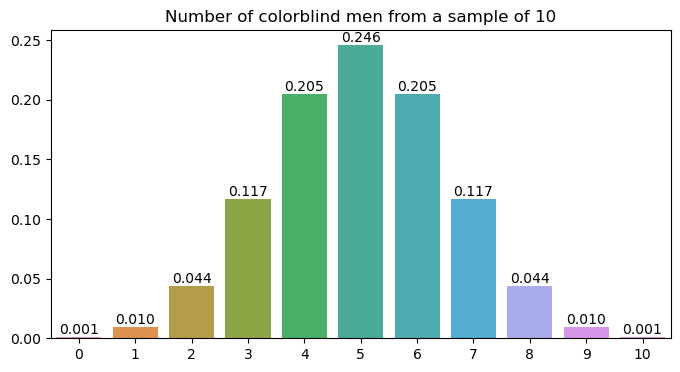

In [15]:
#
n = 10
p = .5
r_values = list(range(n + 1))
mean, var = binom.stats(n, p)
dist = [binom.pmf(r, n, p) for r in r_values ]
#
plt.figure(figsize=(8,4))
ax = sns.barplot(x = r_values, 
                 y= dist,  
                               )

plt.title('Number of colorblind men from a sample of 10')
for i in ax.containers:
    ax.bar_label(i,
                fmt='%.3f'
                )

# Continous Variable 
`Probability Density Function (PDF)`

- Data preparation

Let's manipulate first our dataset to make it a normal distribtion.


In [16]:
def Replace_Outliers(df_name, value, column_name = ""):
    iqr = df_name[column_name].quantile(.75) - df_name[column_name].quantile(.25)
    
    lowerbound = (df_name[column_name].quantile(.25)) - iqr * 1.5
    upperbound = (df_name[column_name].quantile(.75)) + iqr * 1.5
            
    df_name[column_name] = np.where(df_name[column_name] > upperbound, value, df_name[column_name])
    df_name[column_name] = np.where(df_name[column_name] < lowerbound, value, df_name[column_name])

In [21]:
# run this code 5time to get rid of outliers for the sake of this example only
Replace_Outliers(df,
                df.sqft_living.mean(),
                'sqft_living')

<AxesSubplot:xlabel='sqft_living'>

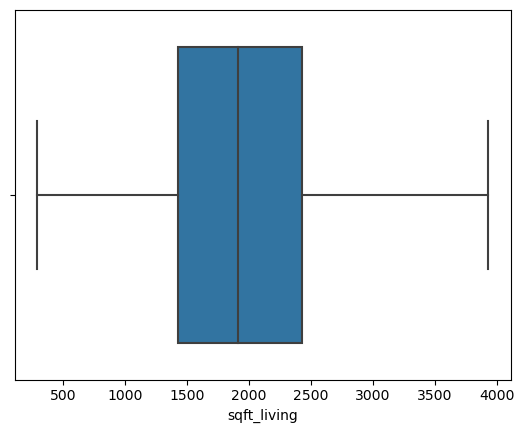

In [23]:
# verify
sns.boxplot(x=df.sqft_living)

Check distribution skewness and kurtosis

In [24]:
_kurtosis = df.sqft_living.kurt()
_skew = df.sqft_living.skew()

print(_kurtosis) # moderately spreadout
print(_skew) # fairly symmetrical

-0.3199816538386857
0.48799612173972073


Kurt and skewness are now in the required value. Let's begin by choosing bins and binwidth that will best represent our histogram.

### Determine how manny bins or datapoints in each bin (binwidth) will  best represent our histogram. 

In [25]:
# We have 3 variables that we may consider (1, 20, and the sqaure root of total number of datapoint)
v1 = 20
v2 = len(df) ** 0.5
_range = df.sqft_living.max() - df.sqft_living.min()

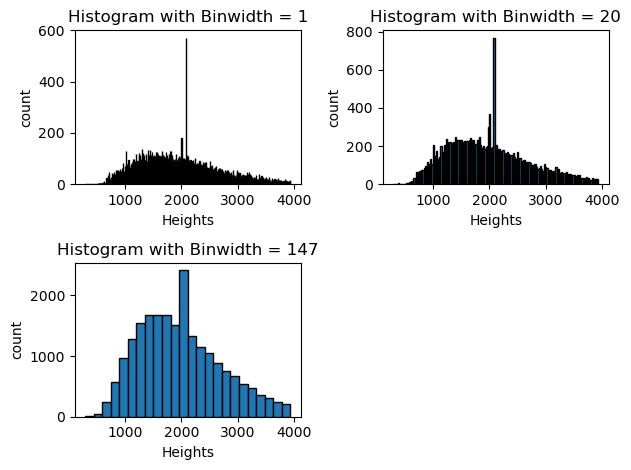

In [26]:
# Show 4 different binwidths

# the number of datapoints in each bin
for i, binwidth in enumerate([1, v1, v2]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(df.sqft_living,
            bins = int(_range/binwidth),
#             color = 'blue', 
            edgecolor = 'black'
           )
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, )
    ax.set_xlabel('Heights')
    ax.set_ylabel('count')

plt.tight_layout()
plt.show()

From the given histogram above looks like 147 best suit our histogram.

### Set stat to `density`
Density plots have an advantage over Histograms because they determine the Shape of the distribution more efficiently than histograms. They do not have to depend on the number of bins used unlike in histograms.

In [43]:
mu = np.mean(df.sqft_living)
print(mu)
sigma = np.std(df.sqft_living)
sigma

1974.0738618786236


720.5274169123986

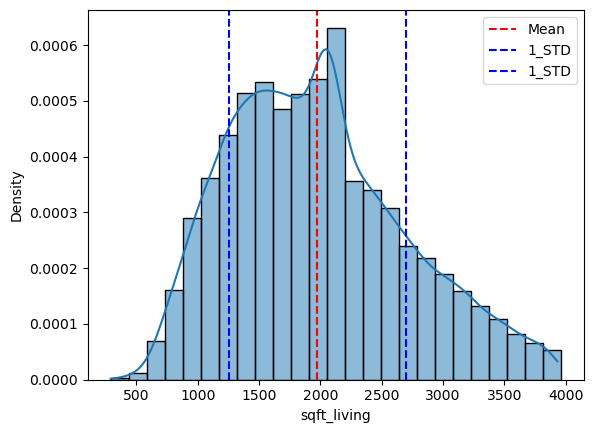

In [44]:
ax = sns.histplot(x=df.sqft_living,
             kde=True,
             stat='density',
             binwidth = 147,
#              bins=3               
             )

# Mean and  1_Standard Deviation
plt.axvline(mu, linestyle='--', color='r', label='Mean')
plt.axvline(mu + sigma, linestyle='--', color='b', label='1_STD')
plt.axvline(mu - sigma, linestyle='--', color='b', label='1_STD')
plt.legend()

### Probability from minimum to mean value?

In [45]:
stats.norm.cdf(mu, mu, sigma)

0.5

### Probability of 1 standard devation area?

In [46]:
stats.norm.cdf(mu + sigma, mu, sigma) - stats.norm.cdf(mu - sigma, mu, sigma)

0.6826894921370859

### Probability of 3500 sqft and above?

In [47]:
1 - stats.norm.cdf(3499, mu, sigma)

0.017155288234757538

### Probability of 3500 and below

In [48]:
stats.norm.cdf(3500, mu, sigma)

0.9829035940247762

###  Example # 1

The weather in the Galapagos islands follows a Normal distribution with a mean of 20 degrees Celcius and a standard deviation of 3 degrees.

In [50]:
mu, sigma = 20, 3

In [51]:
s = np.random.normal(mu, sigma, 1000)

In [52]:
# verify
print(s.mean())
print(s.std())

20.108309095764003
2.986571012246543


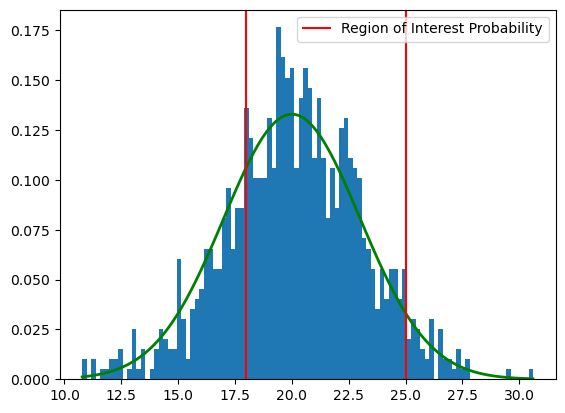

In [53]:
# visualize
count, bins, ignored = plt.hist(s, 100, density=True)
ax = plt.plot(bins, 
         1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='green', )

plt.axvline(18, color='r', linestyle='-', label= 'Region of Interest Probability')
plt.axvline(25, color='r', linestyle='-', )


plt.legend()
plt.show()

In [54]:
stats.norm.cdf(25,mu,sigma) - stats.norm.cdf(18,mu,sigma)

0.6997171101802624

***

# Poisson Distribution
How likely to get a certain value for the given time and average value

Example usage:
- Number of new car in a year
- Number of phone calls per hour
- Number of rain in a month

In poisson distribution the `mean is equal to it's variance` (variance is the square root of STD)

### Working at a call center where the average number of calls between 9am and 10am is 15 calls, what is the probability of observing more than 20 calls?

In [55]:
# average 15 calls from 9am - 10am
mu = 15
# probability of 20 calls
x = 20

In [56]:
# creating a random variance for visualization 
# sample size is set to 100 (100 days observation from 9am - 10am timeline)
s = stats.poisson.rvs(mu , size = 60, random_state=21)
s

array([ 6, 18, 11, 13, 13, 10, 15, 18, 14, 12, 21, 15, 12, 13, 15, 20, 16,
       14, 19, 21, 17, 13, 10, 12, 20, 17, 19, 18, 20, 11, 20, 14, 17, 21,
       20, 13, 16, 15, 22, 13, 22, 18, 15, 17,  6, 16, 10, 10, 17, 21, 16,
       14, 12, 18, 18, 18, 13, 16, 10,  9])

In [57]:
# verify
print(s.mean())
s.var()

15.333333333333334


15.055555555555555

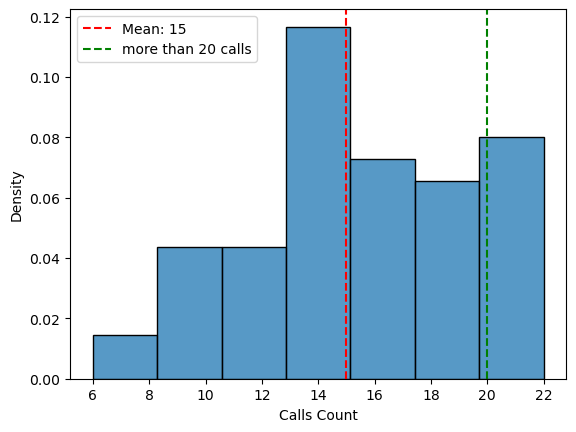

In [58]:
sns.histplot(s,
            stat='density')

plt.axvline(mu, color='r', linestyle='--', label= 'Mean: ' + str(mu))
plt.axvline(20, color='green', linestyle='--', label= 'more than 20 calls')

plt.xlabel('Calls Count')
            
plt.legend()            

### More than 20 calls
21 and more 

In [59]:
1 - stats.poisson.cdf(20, mu)

0.08297091003146029

***

# Notes:

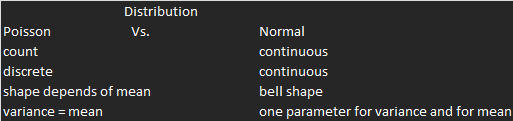

# Central Limit Theorem
The CLT states that the sampling distribution of the mean is normally distributed as long as the population is not too skewed or the sample size is large enough. 

`Sampling distribution`: A sampling distribution is obtained by taking a random sample of a certain size multiple times, taking a sample statistic, and plotting the distribution of this sample statistic.

## Example

Let's say we have a Fish Bussiness in Laguna lake, (Tilapya). We need to transport it in a crate that can only support 750lbs.  


We can't posible know the total population and distribution type of all the Tilapya fishes in the lake. We will apply the Central Limit Theorem here saying that the sampling distribution of the mean is normally distributed.

<br/>

Let's take `weight dataset` as the total population of fishes. In real life can't posible know this, let's pretend that we don't know this record for the sake of this example only.

History records has an estimate average weight of 9.13 lbs per fish with a standard deviation of 5.64 lbs.

In [307]:
df = pd.read_csv('weights.csv')

9.13373087565758
5.637385887147844


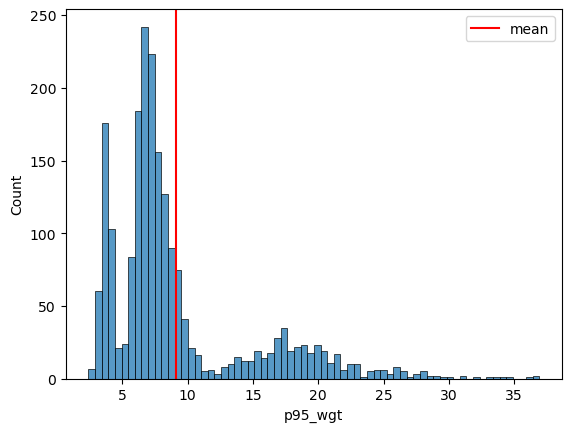

In [308]:
sns.histplot(df.p95_wgt)
plt.axvline(np.mean(df.p95_wgt), color='r', label='mean')
plt.legend()

print(np.mean(df.p95_wgt))
print(np.std(df.p95_wgt))

In [309]:
# Our crate can only contains 75 fishes
750 / 10

75.0

### `Question:`
1. Calculate the probability that the average weight of those 75 fish is less than or equal to 10 lbs.

In real life application we need to retieve 75 fishes as samples from 30 different location in the lake. Get the mean from each samples and plot it in a distribution.

#### Python Application

In [311]:
population = df.p95_wgt
sample_size = 75 

- Get 75 sample size from the population
- Get the mean of this 75 samples  
- Repeat 30 times and plot the mean

In [332]:
sample_means = [] # set to 30

for i in range(30): # loops 30 times from random samp
    # we will randomly select 50 (sample_size) from our population
    samp = np.random.choice(population, sample_size, replace = False) #this has now 50 samples
    # calculate mean here
    samp_mean = np.mean(samp)
    # append here
    sample_means.append(samp_mean)
    # loop 30 time    
# sample_means

####  Mean of means

In [334]:
mean_of_means = float("{:.2f}".format(np.mean(sample_means)))
mean_of_means

9.22

#### Standard Error

In [335]:
np.std(sample_means)

0.6861683014831731

In [339]:
# in the above distribution the std is 5.64. In real life we posible don't know the standard deviation of the total population
# we can use the std of our samples to estimate it (this is called std error)
# std_error = float("{:.2f}".format(np.std(sample_means)))

# lets get 1 sample
std_error = np.std(samp) / (sample_size ** .5)


print(std_error)

0.5627680261332569


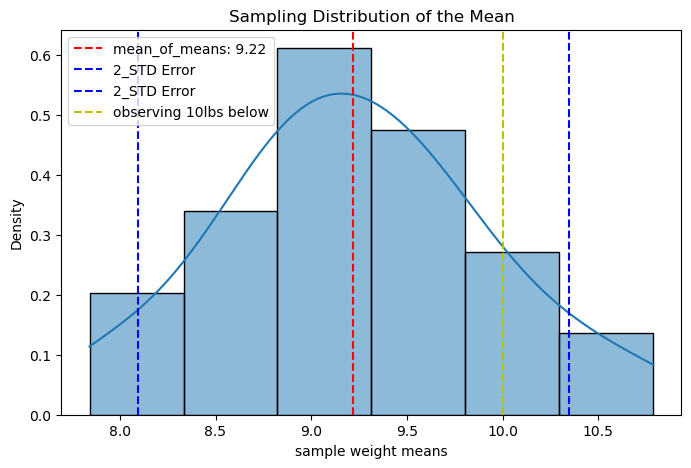

In [344]:
plt.figure(figsize=(8,5))
sns.histplot(sample_means,stat='density', kde='True')

plt.axvline(mean_of_means, color='r', linestyle='--', label='mean_of_means: ' + str(mean_of_means))
plt.axvline(mean_of_means + (std_error * 2), color='b', linestyle='--', label='2_STD Error')
plt.axvline(mean_of_means - (std_error * 2), color='b', linestyle='--', label='2_STD Error')
plt.axvline(10, color='y', linestyle='--', label='observing 10lbs below')

plt.title("Sampling Distribution of the Mean")
plt.xlabel("sample weight means")
plt.legend(loc='upper left')

`Note`:
The mean is not affected by sample size, and the standard error decreases with increased sample size.

Leveraging the part of the CLT that says the sampling distribution is normally distributed we can use the property of a normal 
distribution say's 95% of values are within 2 standard deviation.

Back to the question:

1. Calculate the probability that the average weight of those 75 fish is less than or equal to 10 lbs.

In [345]:
below_10lbs = stats.norm.cdf(10, mean_of_means, std_error)
below_10lbs

0.9171275020639029

There is about 92% that the 75 fishes will be at 10lbs or below. If we are not satisfied with the result we can retrieve more samples from more locations. (increase the loops in python)

***